This document is adapted from a lab prepared by Alex Rutherford, with permission

link to question 1 github repository: https://github.com/tubbsyal/bee2041_p1_g.git

In [1106]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import random as rd
from statistics import mean

# The Doctor Strikes Back

We are now going to change the behaviour of the agents. We will add a new state where agents are immunised. When an agent recovered they will stay in the `Recovered` state but they can be infected again as if they were in the Susceptible state. We will do this by allowing `Recovered` agents to be infected by their neighbors. An agent that is immunised can never be infected. During the initialisation we will immunise a certain percent of the agents.

In [1107]:
# simulation parameters




nb_agents = 100
max_iterations = 10


In [1108]:
# model parameters

## infection

probInfection = 0.2
probRecovery = 0.2
probImmunity= 0.2
probInfectionInit = 0.1
probImmunityInit = 0.1
probInfectionResidual = 0.0

randomInitialInfection=True
randomInitialVaccination=False 

In [1109]:
## communication structure


# model states

systemState = None
nextSystemState = None
immunityPeriod=3
agSusceptible = 0
agInfected = 1
agRecovered = 2
agImmunised= 3

In [1110]:
# helper functions
def test_state(n,value):
    global systemState

    return systemState.nodes[n]['state'] == value

In [1111]:
# model dynamics

def init(network =nx.erdos_renyi_graph, nb_agents =100, netParam=.1, probInfectionInit=0.1, probImmunityInit=0.1, randomInitialVaccination = False, immunityPeriod=3):
    global systemState

    # generate communication strucure
    systemState = nx.grid_2d_graph(10,10)

    # init agents' states
    if randomInitialInfection:
        # random infection
        for a in systemState.nodes():
            if rd.random() < probInfectionInit:
                
                systemState.nodes[a]['state'] = agInfected
                ##print("Oh no, agent", a, "got infected!")
            else:
                systemState.nodes[a]['state'] = agSusceptible
                if rd.random() < probImmunityInit:
                    systemState.nodes[a]['state'] = agImmunised
                   ## print("Agent", a, "is immunised. Such a lucky guy!") 
               ## else:
                   ## print("Agent",a,"isn't infected")
    else:
        # targetted immuniasation
        if randomInitialVaccination:
            for a in systemState.nodes():
                if systemState.nodes[a]['state'] == agInfected:
                    print(" this node is infected")
                elif systemState.nodes[a]['state'] == agSusceptible:
                    if rd.random < probImmunityInit:
                        systemState.nodes[a]['state'] = agImmunised
                    else:
                        systemState.nodes[a]['state'] = agSusceptible
                        
        else:
           ## get 10 values from nb_agents not who are infected or immunised 
           nb_agents_to_immunise = int(probImmunityInit * float(nb_agents))
           while( x < nb_agents_to_immunise):
               systemState.nodes['agSusceptible']['state'] = agImmunised
               x=x+1
               
               
                        

        # get the measure (map node > value)
        measure = dict(nx.degree(systemState))

        # sort the nodes accordingly
        measure = sorted(measure.items(), key=lambda x: x[1],reverse=True)
        # retains only the nodes (discard the value)
        measure = [ x[0] for x in measure ]

        # infect the first N nodes with the highest values
        nb_agents_to_infect = int(probInfectionInit * float(nb_agents))
        ##nb_agents_to_immunise = int(probImmunityInit * float(nb_agents))



        for i in range(nb_agents_to_infect):
            systemState.nodes[measure[i]]['state']=agInfected
        for i in range(nb_agents_to_infect,nb_agents_to_infect+nb_agents_to_immunise):
            systemState.nodes[measure[i]]['state']=agImmunised
        for i in range(nb_agents_to_infect+nb_agents_to_immunise,nb_agents):
            systemState.nodes[measure[i]]['state']=agSusceptible

In [1112]:
def step():
    global systemState

    # copy current network structure and agent s'states
    nextSystemState = systemState.copy()

    # determine next agents' state
    for a in systemState.nodes():
        # if infected
        if test_state(a,agInfected):
            # first try to recover
            if rd.random() < probRecovery:
                nextSystemState.nodes[a]['state'] = agRecovered
               ## print("Good news, agent", a, "is feeling better!")
            elif rd.random() < probImmunity:
                nextSystemState.nodes[a]['state'] = agImmunised
               ## print("Good news, agent", a, "is feeling better and getting Immunised!")
            # if not try to propagage virus
            else:
                for n in systemState.neighbors(a):
                    # if recovered, try to infect (again)
                    if test_state(n,agRecovered):
                        if rd.random() < probInfection:
                            nextSystemState.nodes[n]['state'] = agInfected	
                            ##print("Oh no, agent", n, "got infected AGAIN!")
                    # otherwise, try to infect
                    elif test_state(n,agSusceptible):
                        if rd.random() < probInfection:
                            nextSystemState.nodes[n]['state'] = agInfected	
                            ##print("Oh no, agent", n, "got infected!")
        # residual infection
        if test_state(a,agSusceptible) or test_state(a,agRecovered):
            if rd.random() < probInfectionResidual:
                ##if test_state(a,agRecovered):
                    ##print("Oh no, agent", a, "got infected AGAIN!")
                    ##print("Oh no, agent", a, "got infected!")
                nextSystemState.nodes[a]['state'] = agInfected

    # synchronous transition to next state
    systemState = nextSystemState

In [1113]:
statS = []
statI = []
statR = []
statM = []

def collect_statistics():
    global systemState

    nbS = 0
    nbI = 0
    nbR = 0
    nbM = 0
    for a in systemState.nodes():
        if test_state(a,agSusceptible):
            nbS = nbS + 1
        if test_state(a,agInfected):
            nbI = nbI + 1
        if test_state(a,agRecovered):
            nbR = nbR + 1
        if test_state(a,agImmunised):
            nbM = nbM + 1
    statS.append(nbS)
    statI.append(nbI)
    statR.append(nbR)
    statM.append(nbM)
    return statS, nbI,

In [1114]:
def display_statistics():
    plt.plot(statS,label="S", color="b")
    plt.plot(statI,label="I", color="r")
    plt.plot(statR,label="R", color="g")
    plt.plot(statM,label="M", color="y")

    plt.legend()
    plt.show()

In [1115]:
def draw():
    global systemState

    list_colors = []
    for a in systemState.nodes():
        if test_state(a,agSusceptible):
            list_colors.append("b")
        if test_state(a,agInfected):
            list_colors.append("r")
        if test_state(a,agRecovered):
            list_colors.append("g")
        if test_state(a,agImmunised):
            list_colors.append("y")

    nx.draw(systemState, node_color = list_colors)
    plt.show()

In [1116]:
def func():
    
    return 



In [1117]:
def run_simulation(nb_agents=100,nba = 10, maxIter = 100, probI = 0.2, probR = 0.2, probV = 0.0, probI_init = 0.1, probV_init = 0.1, vRandom = True, immPeriod = 3, network = nx.erdos_renyi_graph, netParam=0.1, rep=12):
    df = pd.DataFrame()
    print("starting simulation")
    excess = False
    z = 0  
    statli = []
    Never_Infectedli = []   
    
    while z<rep: 
           
         init(network, nb_agents, netParam, probInfectionInit, probImmunityInit, randomInitialVaccination ,immunityPeriod)
         #draw()
         
         li = []
         i = 0
         while i < max_iterations:
              
              
           ## print("== round", i)
              step()
        #draw()
              nbS, nbI  = collect_statistics()
              Never_Infected = ((statS[-1]+statM[-1])/nb_agents)*100
             
     
              li.append(Never_Infected)
              
             
              if nbI == 0:
                 i = i + 1
                 break
              i = i + 1
         z=z+1
         Never_Infectedli.append(li)
         
    ##draw()	
         ##display_statistics()
     
    df   
    rep = rep-1
    

    
    return Never_Infectedli

##if __name__ == "__main__":
     ##run_simulation()
    ##print(x)1
    


In [1118]:
## for part a 
control_dic = {}
timestep3_dic ={}
timestep6_dic={}
print(np.logspace(-3,0,12))



[0.001      0.00187382 0.00351119 0.00657933 0.01232847 0.0231013
 0.04328761 0.08111308 0.15199111 0.28480359 0.53366992 1.        ]


In [1119]:
## for control 
q=run_simulation(network=nx.erdos_renyi_graph,nb_agents=500,probV_init = 0)
print(q)
df = pd.DataFrame(q)
df
av = df.mean(axis =1)
av.sort_values()
print(av)
av = av.to_dict()

x1= list(av.values())
x1.sort(reverse=True)
print(x1)


starting simulation
[[18.8, 18.2, 17.599999999999998, 17.8, 17.2, 17.0, 16.6, 16.400000000000002, 16.6, 17.0], [16.6, 16.6, 16.6, 16.400000000000002, 16.6, 17.2, 17.0, 16.6, 16.8, 17.0], [16.400000000000002, 15.8, 15.2, 15.6, 15.2, 15.2, 15.4, 15.2, 15.0, 15.0], [17.4, 17.599999999999998, 17.4, 17.2, 16.8, 17.0, 16.8, 17.0, 17.0, 17.0], [18.6, 18.4, 18.2, 18.4, 18.2, 18.4, 18.4, 18.4, 18.4], [17.4, 17.4, 16.8, 16.0, 15.8, 15.4, 16.0, 16.2, 16.2, 16.400000000000002], [19.0, 19.2, 18.8, 18.4, 18.2, 18.6, 18.6, 18.6, 18.2, 18.0], [18.0, 18.0, 18.2, 18.4], [17.2, 16.6, 16.6, 17.2, 17.599999999999998, 17.8, 17.8, 17.599999999999998, 17.8, 17.8], [17.0, 17.2, 17.4, 17.599999999999998, 17.4, 16.8, 15.8, 15.8, 15.8, 15.8], [18.0, 17.8, 18.0, 17.8, 18.0, 17.8, 18.0], [17.599999999999998, 17.4, 17.2, 17.0, 16.6, 16.400000000000002, 16.400000000000002, 16.6, 16.6, 17.4]]
0     17.320000
1     16.740000
2     15.400000
3     17.120000
4     18.377778
5     16.360000
6     18.560000
7     18.150000

In [1120]:
## for 3-timestep, 40% immunity
x2=run_simulation(network=nx.erdos_renyi_graph,nb_agents=500,probV_init = 0.4)

print(x2)
df = pd.DataFrame(x2)
df
av = df.mean(axis =1)
av.sort_values()
print(av)
av = av.to_dict()

x2= list(av.values())
x2.sort(reverse=True)
print(x2)

starting simulation
[[17.8, 17.8, 17.0, 16.8, 17.4, 17.4, 17.2, 17.599999999999998, 17.8, 17.8], [17.599999999999998, 17.0, 16.6, 16.2, 16.2, 15.8, 16.0, 16.0, 16.2, 16.0], [17.2, 16.400000000000002, 17.2, 17.0, 17.2, 16.8, 16.2, 16.0, 15.8, 16.0], [18.2, 17.8, 17.4, 17.2, 17.2, 17.0, 17.0, 17.0, 17.0, 17.0], [16.400000000000002, 16.0, 16.0, 16.6, 16.8, 16.6, 16.6, 16.8, 17.0], [17.8, 17.599999999999998, 17.0, 16.8, 17.4, 17.599999999999998, 17.8, 17.599999999999998, 17.8], [17.4, 16.0, 16.2, 15.4, 14.799999999999999, 15.0, 15.4, 15.6, 15.8, 15.8], [17.8, 18.2, 18.6, 18.0, 18.0, 18.0, 18.0, 18.2, 18.2, 18.6], [16.2, 15.4, 15.6, 15.0, 15.2, 15.2, 14.799999999999999, 14.6, 14.399999999999999, 14.6], [18.4, 18.6, 18.8, 18.8, 18.8, 18.8], [17.4, 17.0, 16.8, 16.400000000000002, 16.6, 16.8, 16.6, 16.8, 17.0], [17.4, 17.0, 17.2, 17.2, 17.0, 16.6, 17.2, 17.2, 17.4, 17.2]]
0     17.460000
1     16.360000
2     16.580000
3     17.280000
4     16.533333
5     17.488889
6     15.740000
7     18.16

In [1121]:
#For 6-timestep, 20% immunity
x3=run_simulation(network=nx.erdos_renyi_graph,nb_agents=500,probV_init = 0.2,immPeriod = 6)
q = x3
print(q)
df = pd.DataFrame(q)
df
av = df.mean(axis =1)
av.sort_values()
print(av)
av = av.to_dict()

x3= list(av.values())
x3.sort(reverse=True)
print(x3)


starting simulation
[[18.0, 17.4, 16.8, 17.0, 17.0, 16.6, 16.6, 16.400000000000002, 16.2, 16.2], [15.0, 15.4, 15.2, 14.6, 14.799999999999999, 14.399999999999999, 14.799999999999999, 14.799999999999999, 14.799999999999999, 15.0], [19.0, 19.0, 19.2, 19.400000000000002], [19.2, 19.0, 18.4, 18.4, 18.2, 18.0, 18.0, 17.8, 17.8, 17.8], [16.8, 17.0, 17.2, 17.0, 17.0, 16.6, 16.8, 16.6, 16.6, 16.6], [17.599999999999998, 17.599999999999998, 17.2, 16.6, 16.6, 17.0, 17.2, 17.4, 17.4, 17.4], [17.2, 16.0, 16.0, 16.6, 17.0, 17.0, 17.0, 17.2, 17.2, 17.2], [17.4, 17.599999999999998, 16.6, 16.8, 17.0, 17.2, 17.2, 17.0, 17.0, 17.0], [19.2, 19.2, 19.400000000000002], [18.4, 18.0, 17.599999999999998, 17.4, 17.4, 17.2, 17.2, 17.599999999999998, 17.4, 18.0], [16.400000000000002, 16.0, 15.6, 15.4, 15.8, 15.8, 16.0, 16.400000000000002, 16.6, 16.8], [17.599999999999998, 17.8, 17.8, 18.0, 18.0, 17.8, 17.8, 17.599999999999998, 17.8, 17.8]]
0     16.820000
1     14.880000
2     19.150000
3     18.260000
4     16.82

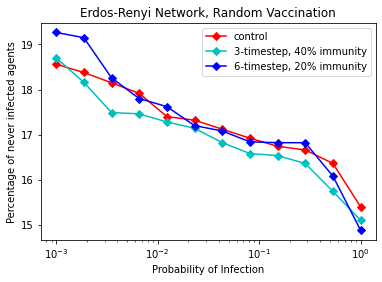

In [1122]:
plt.title("Erdos-Renyi Network, Random Vaccination")
plt.xlabel("Probability of Infection")
plt.ylabel("Percentage of never infected agents")
plt.xscale("log")
x1.sort(reverse=True)
x2.sort(reverse=True)
x3.sort(reverse=True)
plt.plot(np.logspace(-3,0,12),x1,label = "control",color = "red",marker='D')
plt.plot(np.logspace(-3,0,12),x2,label = "3-timestep, 40% immunity",color = "c",marker='D')
plt.plot(np.logspace(-3,0,12),x3,label = "6-timestep, 20% immunity",color = "blue",marker='D')
plt.legend()
plt.show()

In [1123]:
q=run_simulation(network=nx.barabasi_albert_graph,nb_agents=500,probV_init = 0)
print(q)
df = pd.DataFrame(q)
df
av = df.mean(axis =1)
av.sort_values()
print(av)
av = av.to_dict()

x1= list(av.values())
x1.sort(reverse=True)
print(x1)


starting simulation
[[16.6, 18.2, 18.0, 17.8, 17.4, 17.8, 18.0, 18.0, 18.0, 18.2], [17.4, 17.8, 17.599999999999998, 18.0, 18.0, 17.8, 18.0, 18.2, 18.2, 18.2], [17.599999999999998, 17.2, 16.8, 16.400000000000002, 15.8, 15.6, 15.2, 15.0, 15.2, 15.8], [18.6, 17.8, 17.8, 17.599999999999998, 17.8, 17.8, 17.8, 17.599999999999998, 17.8, 17.8], [17.0, 17.4, 17.8, 17.8, 17.8, 17.8, 17.8, 17.599999999999998, 17.599999999999998, 17.599999999999998], [17.2, 16.6, 16.8, 16.400000000000002, 16.0, 16.400000000000002, 16.400000000000002, 15.8, 15.8, 15.6], [18.4, 18.0, 18.0, 17.4, 17.2, 17.599999999999998, 17.599999999999998, 17.599999999999998, 17.4, 17.599999999999998], [17.4, 17.599999999999998, 17.8, 17.4, 17.599999999999998, 17.8, 18.0, 18.2, 18.2, 18.0], [17.8, 18.0, 17.8, 18.2, 18.2, 18.2, 18.4, 18.4], [18.4, 18.0, 17.4, 17.4, 17.2, 17.4, 18.4], [16.400000000000002, 15.6, 15.4, 15.2, 14.799999999999999, 15.0, 15.2, 15.8, 15.8, 16.2], [17.599999999999998, 17.2, 16.8, 17.2, 17.599999999999998, 17

In [1124]:
x2=run_simulation(network=nx.barabasi_albert_graph,nb_agents=500,probV_init = 0.4)

print(x2)
df = pd.DataFrame(x2)
df
av = df.mean(axis =1)
av.sort_values()
print(av)
av = av.to_dict()

x2= list(av.values())
x2.sort(reverse=True)
print(x2)

starting simulation
[[18.4, 17.8, 17.8, 17.8, 17.599999999999998, 17.599999999999998, 18.0, 18.0, 18.0], [16.400000000000002, 15.8, 15.4, 15.6, 15.4, 15.6, 15.4, 14.799999999999999, 15.0, 14.799999999999999], [17.599999999999998, 17.2, 17.8, 17.4, 18.0, 17.4, 17.4, 17.599999999999998, 17.4, 17.4], [16.6, 16.400000000000002, 16.6, 16.6, 16.400000000000002, 16.400000000000002, 16.400000000000002, 16.6], [17.4, 17.4, 17.2, 16.8, 16.6, 17.0, 17.0, 17.0, 16.8, 17.0], [17.2, 17.0, 17.2, 17.2, 17.0, 16.6, 16.8, 17.0, 17.0, 17.2], [17.8, 17.8, 17.8, 17.599999999999998, 17.4, 17.2, 17.0, 17.0, 17.8, 17.8], [17.4, 17.4, 17.8, 17.8, 17.8, 17.8, 17.8, 17.8], [17.8, 17.2, 16.400000000000002, 17.0, 16.8, 17.0, 17.0, 17.0, 17.0], [17.4, 17.0, 16.8, 16.8, 16.8, 17.0, 16.8, 16.8, 17.0, 16.8], [17.599999999999998, 17.0, 16.8, 16.8, 16.400000000000002, 17.2, 17.0, 17.2, 17.0, 17.0], [18.6, 18.8, 19.400000000000002, 19.2, 19.2, 19.0, 19.0, 19.0, 19.0, 19.2]]
0     17.888889
1     15.420000
2     17.520000

In [1125]:
x3=run_simulation(network=nx.barabasi_albert_graph,nb_agents=500,probV_init = 0.2,immPeriod = 6)
q = x3
print(q)
df = pd.DataFrame(q)
df
av = df.mean(axis =1)
av.sort_values()
print(av)
av = av.to_dict()

x3= list(av.values())
x3.sort(reverse=True)
print(x3)

starting simulation
[[17.599999999999998, 17.599999999999998, 17.599999999999998, 17.2, 16.8, 17.2, 17.599999999999998, 17.599999999999998, 17.8, 17.599999999999998], [16.400000000000002, 16.8, 17.0, 17.2, 17.2, 17.2, 17.0, 17.0, 16.6, 16.400000000000002], [17.4, 17.0, 16.6, 15.8, 15.4, 15.2, 15.8, 16.6, 16.6, 16.400000000000002], [17.0, 16.6, 16.400000000000002, 16.400000000000002, 16.400000000000002, 17.0, 17.0, 17.0, 17.0, 17.0], [17.2, 17.0, 16.8, 17.2, 17.4, 17.599999999999998, 17.599999999999998, 17.599999999999998, 17.4, 17.2], [17.4, 16.6, 17.4, 17.2, 17.2, 17.599999999999998, 17.8, 17.8, 17.8], [18.4, 17.4, 18.0, 18.0, 17.599999999999998, 17.2, 17.0, 17.4, 17.4, 17.599999999999998], [18.0, 18.0, 17.8, 17.2, 17.2, 17.2, 17.4, 17.4, 17.0, 17.0], [18.6, 18.4, 18.0, 18.4, 18.4], [18.0, 18.2, 18.6, 18.6, 18.6, 18.6, 18.6, 18.6], [17.8, 17.8, 17.8, 18.0, 18.2, 18.0, 18.0, 17.599999999999998, 17.599999999999998, 17.599999999999998], [18.6, 18.2, 18.0, 18.0, 18.6, 19.0, 18.8, 18.8, 18

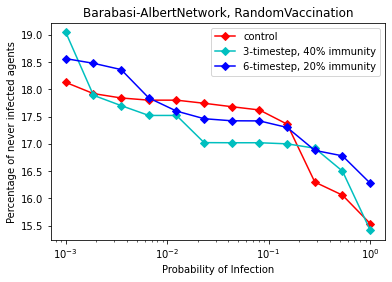

In [1126]:
plt.title("Barabasi-AlbertNetwork, RandomVaccination")
plt.xlabel("Probability of Infection")
plt.ylabel("Percentage of never infected agents")
plt.xscale("log")
x1.sort(reverse=True)
x2.sort(reverse=True)
x3.sort(reverse=True)
plt.plot(np.logspace(-3,0,12),x1,label = "control",color = "red",marker='D')
plt.plot(np.logspace(-3,0,12),x2,label = "3-timestep, 40% immunity",color = "c",marker='D')
plt.plot(np.logspace(-3,0,12),x3,label = "6-timestep, 20% immunity",color = "blue",marker='D')
plt.legend()
plt.show()

In [1127]:
q=run_simulation(network=nx.barabasi_albert_graph,nb_agents=500,probV_init = 0,vRandom=False)
print(q)
df = pd.DataFrame(q)
df
av = df.mean(axis =1)
av.sort_values()
print(av)
av = av.to_dict()

x1= list(av.values())
x1.sort(reverse=True)
print(x1)


starting simulation
[[15.8, 15.8, 15.8, 15.0, 15.0, 15.0, 14.799999999999999, 15.0, 15.0, 15.4], [17.599999999999998, 17.2, 17.8, 18.4, 18.8, 18.8, 18.8, 18.8, 18.8, 18.6], [16.8, 16.6, 15.6, 15.6, 16.2, 16.400000000000002, 16.400000000000002, 16.2, 16.2, 15.6], [17.599999999999998, 17.2, 16.8, 16.6, 16.400000000000002, 17.0, 16.8, 17.2, 17.2, 17.4], [18.0, 17.8, 17.8, 17.8, 17.599999999999998, 17.8, 18.0, 17.8, 17.8, 17.8], [16.400000000000002, 16.0, 16.2, 15.6, 16.400000000000002, 16.6, 16.8], [16.8, 17.2, 16.8, 16.6, 16.0, 16.400000000000002, 16.400000000000002, 16.400000000000002, 16.400000000000002, 16.400000000000002], [17.4, 16.6, 17.2, 16.8, 16.6, 16.8, 17.0, 17.0, 17.0, 17.0], [17.2, 17.2, 16.6, 16.400000000000002, 16.8, 17.0, 17.2, 17.4, 17.2, 17.4], [17.0, 16.6, 15.8, 15.6, 15.8, 16.0, 16.8, 16.8, 16.8, 17.0], [18.6, 18.8, 18.8], [17.2, 16.8, 17.0, 17.2, 17.0, 17.0, 17.0, 17.2, 17.2, 17.2]]
0     15.260000
1     18.360000
2     16.160000
3     17.020000
4     17.820000
5    

In [1128]:
x2=run_simulation(network=nx.barabasi_albert_graph,nb_agents=500,probV_init = 0.4,vRandom=False)

print(x2)
df = pd.DataFrame(x2)
df
av = df.mean(axis =1)
av.sort_values()
print(av)
av = av.to_dict()

x2= list(av.values())
x2.sort(reverse=True)
print(x2)

starting simulation
[[17.0, 17.8, 17.599999999999998, 17.4, 17.4, 17.599999999999998, 17.599999999999998, 17.599999999999998], [18.0, 17.0, 16.8, 16.2, 16.8, 17.0, 17.0, 17.0, 17.0, 17.2], [17.8, 17.8, 17.2, 16.6, 16.400000000000002, 16.400000000000002, 17.0, 17.0, 16.6, 16.400000000000002], [16.0, 15.2, 15.2, 16.2, 15.6, 15.8, 15.8, 15.2, 15.2, 15.4], [17.4, 16.8, 16.6, 16.400000000000002, 16.400000000000002, 16.6, 16.8, 17.0, 17.0, 17.0], [18.2, 17.599999999999998, 17.0, 17.0, 17.599999999999998, 17.4, 17.2, 17.0, 16.8, 16.2], [17.0, 17.4, 17.4, 17.2, 16.8, 17.4, 17.599999999999998, 17.8], [18.0, 17.599999999999998, 17.599999999999998, 16.8, 17.4, 17.8, 18.0, 18.2], [17.4, 17.2, 17.0, 16.6, 16.8, 17.599999999999998, 17.8], [17.8, 18.0, 18.4, 18.4, 18.4, 18.4, 18.2, 18.4], [17.8, 17.8, 17.8, 18.0, 18.2, 18.2, 18.2, 18.2, 18.2, 18.2], [17.8, 17.599999999999998, 17.4, 17.4, 17.4, 17.4, 17.0, 16.8, 17.2, 17.4]]
0     17.500
1     17.000
2     16.920
3     15.560
4     16.800
5     17.200

In [1129]:
x3=run_simulation(network=nx.barabasi_albert_graph,nb_agents=500,probV_init = 0.2,immPeriod = 6,vRandom=False)
q = x3
print(q)
df = pd.DataFrame(q)
df
av = df.mean(axis =1)
av.sort_values()
print(av)
av = av.to_dict()

x3= list(av.values())
x3.sort(reverse=True)
print(x3)

starting simulation
[[18.2, 18.4, 18.2, 18.0, 17.599999999999998, 18.0, 17.8, 18.0, 18.0], [17.0, 16.8, 16.400000000000002, 16.400000000000002, 16.400000000000002, 16.6, 16.6, 16.6, 16.6, 16.400000000000002], [17.0, 17.4, 17.8, 17.4, 17.4, 17.599999999999998, 17.2, 17.4, 17.4, 17.599999999999998], [16.2, 15.4, 15.4, 15.0, 15.8, 15.8, 15.8, 16.0, 15.8, 15.8], [16.6, 16.2, 15.2, 15.8, 16.0, 16.2, 16.0, 15.6, 15.6, 15.4], [17.599999999999998, 17.599999999999998, 17.599999999999998, 17.8, 18.2, 18.4, 18.4, 18.4, 18.4, 18.2], [15.4, 15.6, 16.2, 16.6, 16.8, 17.0, 17.0, 17.0, 17.0], [19.2, 19.2, 19.2, 19.0, 19.400000000000002], [19.0, 19.2, 19.0, 19.0, 19.0, 19.2, 19.2, 19.400000000000002], [18.0, 17.599999999999998, 17.4, 16.400000000000002, 16.6, 17.2, 17.2, 17.599999999999998, 17.4, 17.4], [18.0, 18.4, 18.6, 18.4, 18.6, 18.6, 18.4, 18.4, 18.4, 18.4], [18.4, 18.4, 18.0, 17.8, 18.0, 18.2]]
0     18.022222
1     16.580000
2     17.420000
3     15.700000
4     15.860000
5     18.060000
6     1

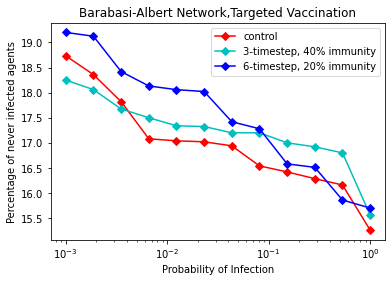

In [1130]:
plt.title("Barabasi-Albert Network,Targeted Vaccination")
plt.xlabel("Probability of Infection")
plt.ylabel("Percentage of never infected agents")
plt.xscale("log")
x1.sort(reverse=True)
x2.sort(reverse=True)
x3.sort(reverse=True)
plt.plot(np.logspace(-3,0,12),x1,label = "control",color = "red",marker='D')
plt.plot(np.logspace(-3,0,12),x2,label = "3-timestep, 40% immunity",color = "c",marker='D')
plt.plot(np.logspace(-3,0,12),x3,label = "6-timestep, 20% immunity",color = "blue",marker='D')
plt.legend()
plt.show()

the reason the third grpah is different is because it shows a more significant effect that the 6-timestep than the other graphs. That model aims to test whether a targeted vaccination apporach is better than a random approch. By removing the amount of randomness the targeted vaccination approch using the top vaccine comes out on top.  